In [47]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
import imageio as im
from skimage import data, io, transform

In [48]:
def histVisualization(x, y, gray_source_im, gray_target_im, newWidth, newHeight):

    plt.figure(figsize=(20,20))

    plt.subplot(311)
    plt.title("Vstupny vyrez")
    plt.imshow(gray_source_im[x:(newWidth + x), y:(newHeight + y)], cmap='gray')

    plt.subplot(312)
    plt.title("Povodny histogram vstupneho vyrezu")
    plt.hist(gray_source_im[x:(newWidth + x), y:(newHeight + y)].ravel(), bins=200, color='blue')

    plt.subplot(313)
    plt.title("Cielovy histogram vyrezu")
    plt.hist(gray_target_im[x:(newWidth + x), y:(newHeight + y)].ravel(), bins=200, color='blue')

In [49]:
def adap_hist_matching(source_im, target_im, D):

    source_width = int(source_im.shape[1])
    souce_height = int(source_im.shape[0])

    target_width = int(source_im.shape[1])
    target_height = int(source_im.shape[0])

    if (source_width == target_width and souce_height == target_height):
        newWidth = source_width // D
        newHeight = souce_height // D
    else:
        target_im = transform.resize(target_im, (souce_height, source_width))
        newWidth = source_width // D
        newHeight = souce_height // D

    gray_source_im = (rgb2gray(source_im))
    gray_target_im = (rgb2gray(target_im))

    x, y = 0, 0

    for i in range(0, D):
        for j in range(0, D):

            source_values, source_unique_indices, source_counts = np.unique(gray_source_im[x:(newWidth + x), y:(newHeight + y)].ravel(), return_inverse=True, return_counts=True)
            target_values, target_counts = np.unique(gray_target_im[x:(newWidth + x), y:(newHeight + y)].ravel(), return_counts=True)

            source_quantiles = np.cumsum(source_counts) / gray_source_im[x:(newWidth + x), y:(newHeight + y)].size
            target_quantiles = np.cumsum(target_counts) / gray_target_im[x:(newWidth + x), y:(newHeight + y)].size

            interpolation_values = np.interp(source_quantiles, target_quantiles, target_values)
            gray_source_im[x:(newWidth + x), y:(newHeight + y)] = interpolation_values[source_unique_indices].reshape(gray_source_im[x:(newWidth + x), y:(newHeight + y)].shape)

            if (i == 1 and j == 0):
                histVisualization(x, y, gray_source_im, gray_target_im, newWidth, newHeight)

            y = y + int(newHeight)
        x = x + int(newWidth)
        y = 0

    return gray_source_im

<ipython-input-49-cd58e0b64d75>:17: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_source_im = (rgb2gray(source_im))
<ipython-input-49-cd58e0b64d75>:18: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_target_im = (rgb2gray(target_im))


[2.44140625e-04 4.24804688e-02 1.46972656e-01 2.59521484e-01
 3.35449219e-01 3.92822266e-01 4.40185547e-01 4.74853516e-01
 5.05126953e-01 5.33691406e-01 5.60058594e-01 5.82031250e-01
 6.06689453e-01 6.32812500e-01 6.62597656e-01 6.90917969e-01
 7.26806641e-01 7.53662109e-01 7.77832031e-01 8.03466797e-01
 8.20556641e-01 8.40087891e-01 8.62548828e-01 8.75488281e-01
 8.85498047e-01 8.96484375e-01 9.04785156e-01 9.11865234e-01
 9.18457031e-01 9.24316406e-01 9.29931641e-01 9.36035156e-01
 9.42382812e-01 9.47265625e-01 9.51416016e-01 9.55810547e-01
 9.61181641e-01 9.66796875e-01 9.70947266e-01 9.76074219e-01
 9.80468750e-01 9.84375000e-01 9.86572266e-01 9.89501953e-01
 9.91210938e-01 9.93408203e-01 9.95361328e-01 9.95849609e-01
 9.97070312e-01 9.98291016e-01 9.99267578e-01 1.00000000e+00]
[0.00317383 0.00366211 0.00439453 0.00537109 0.00634766 0.00708008
 0.00805664 0.00927734 0.01025391 0.01147461 0.01245117 0.01391602
 0.01464844 0.01611328 0.0168457  0.01953125 0.02197266 0.02392578
 0.02

(array([ 428.,  226.,  254.,   94.,  125.,  236.,  200.,  135.,  235.,
         474.,  135.,  364.,   51.,  175.,  380.,  425.,   65.,  245.,
         174.,  494.,  743.,  579.,  598.,   48.,  212.,  378.,  109.,
         243.,  195.,  217.,  168.,  160.,  152.,  136.,  555.,  143.,
         115.,  584.,  585.,  135.,  292.,  174.,  211.,  160.,  338.,
         120.,  193.,  300.,  371.,  671.,  138.,  493.,  531.,  254.,
         576.,  826.,  270.,  101.,  296.,  176.,  214.,   44.,  399.,
         709.,   59.,  214.,  183.,  256.,  511.,   33.,   62.,  235.,
         790.,  182.,  657.,  174.,  728.,  243.,   50.,  793.,  439.,
         109.,  623.,  298.,  142.,  130.,  206.,  470.,  242.,  627.,
         210.,  726.,   78.,  274.,  565.,  412.,  181.,   56.,  402.,
         231.,  405.,  563.,  346.,  327.,  127.,  654.,    0.,  575.,
         193.,  251.,  405.,  332.,  387.,  561.,  498.,    0.,  386.,
         168.,  194.,  486.,  308.,  628.,   86.,  666.,  362.,  359.,
      

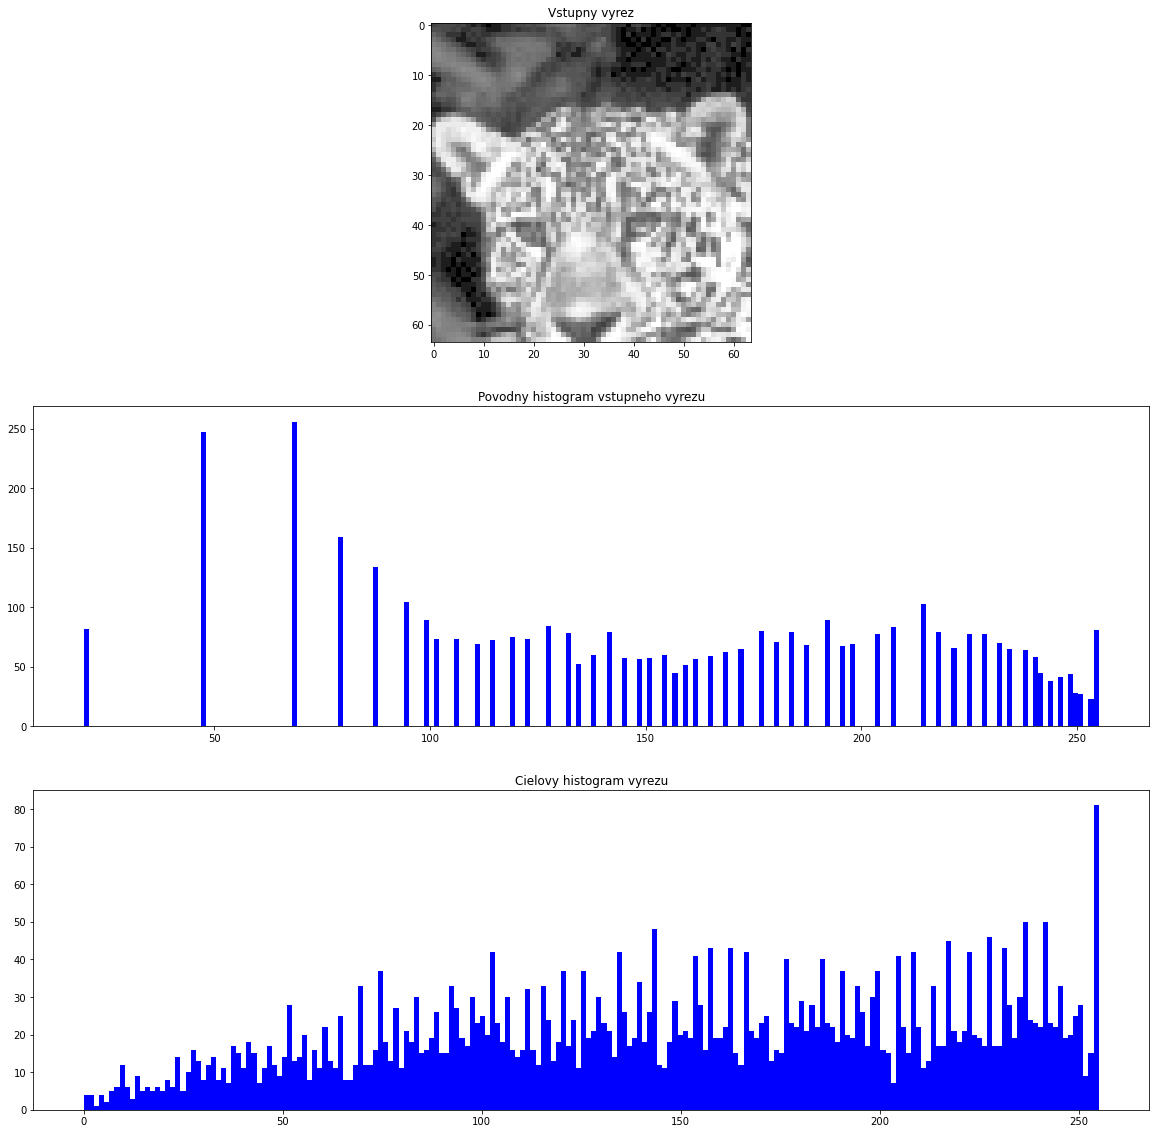

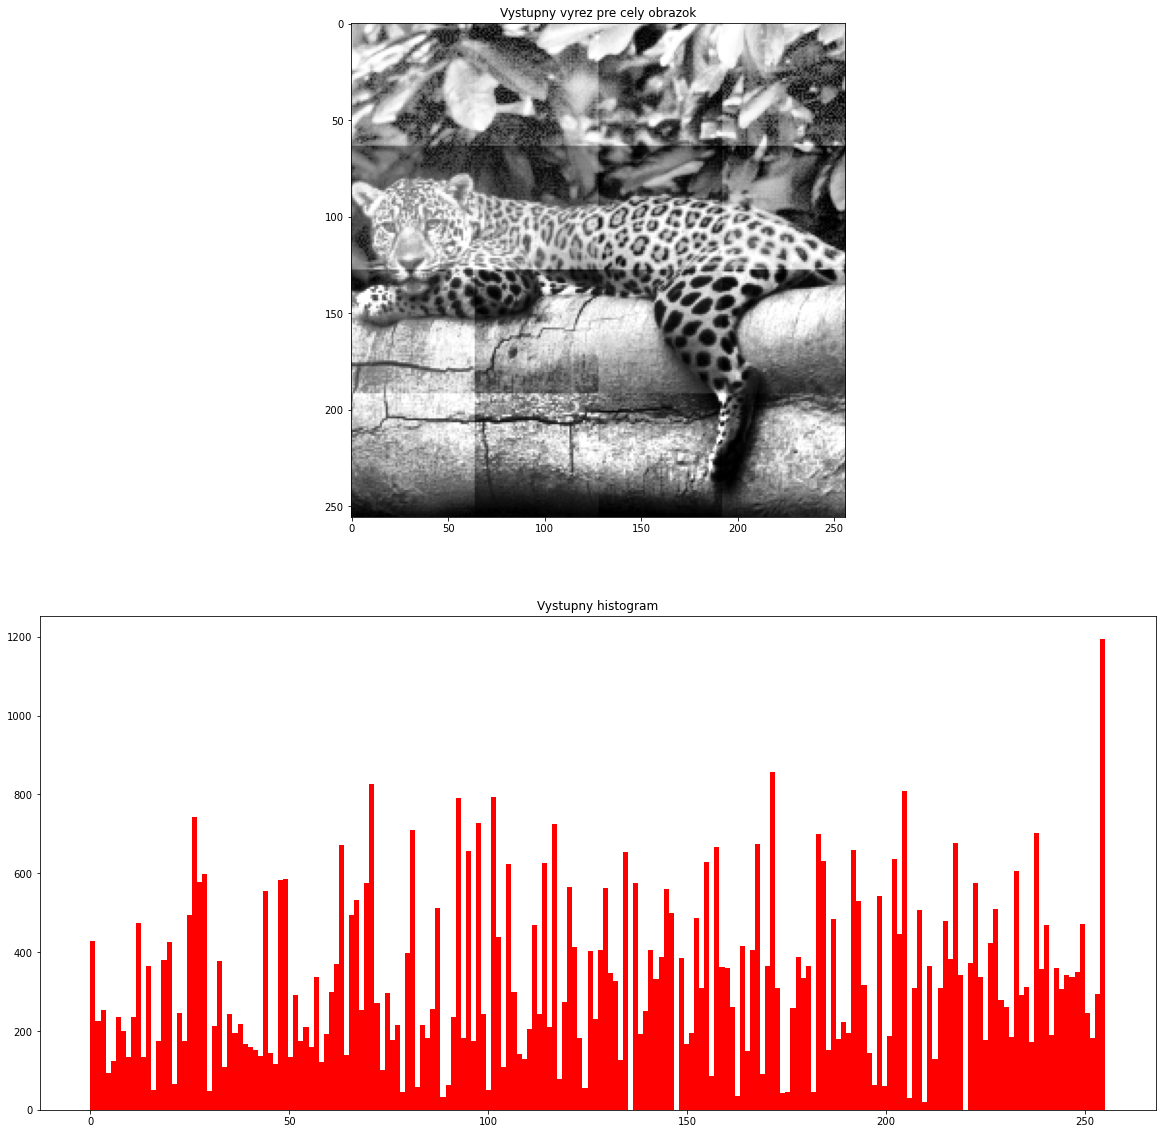

In [50]:
source_im = im.imread('./jaguar.gif')
target_im = im.imread('./artificial_texture.jpg')
D = 4

final_im = adap_hist_matching(source_im,target_im,D)

plt.figure(figsize=(20,20))

plt.subplot(211)
plt.title("Vystupny vyrez pre cely obrazok")
plt.imshow(final_im, cmap='gray')

plt.subplot(212)
plt.title("Vystupny histogram")
plt.hist(final_im.ravel(), bins=200, color='red')